# 02 - Tradespace Exploration

In [1]:
from AMAT.planet import Planet
from AMAT.vehicle import Vehicle

import numpy as np
from scipy import interpolate

import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.patches import Polygon
import os

In [2]:
# Create a planet object for Uranus
planet=Planet("URANUS")
planet.h_skip = 1000e3
planet.h_trap = 50e3

# Load an nominal atmospheric profile with height, temp, pressure, density data
planet.loadAtmosphereModel('../../../atmdata/Uranus/uranus-ames.dat', 0 , 1 , 2, 3)

In [3]:
# skip if not running for the firs time
os.makedirs('../../../data/acta-astronautica/uranus-orbiter-probe/')

FileExistsError: [Errno 17] File exists: '../../../data/acta-astronautica/uranus-orbiter-probe/'

In [3]:
vinf_kms_array = np.linspace( 0.0,   30.0,  11)
LD_array       = np.linspace( 0.0,    1.0 , 11)

In [4]:
runID = 'uranus-lift-'

num_total      = len(vinf_kms_array)*len(LD_array)
count = 1

v0_kms_array    = np.zeros(len(vinf_kms_array))
v0_kms_array[:] = np.sqrt(1.0*(vinf_kms_array[:]*1E3)**2.0 +\
                          2*np.ones(len(vinf_kms_array))*\
                          planet.GM/(planet.RP+1000.0*1.0E3))/1.0E3

overShootLimit_array  = np.zeros((len(v0_kms_array),len(LD_array)))
underShootLimit_array = np.zeros((len(v0_kms_array),len(LD_array)))
exitflag_os_array     = np.zeros((len(v0_kms_array),len(LD_array)))
exitflag_us_array     = np.zeros((len(v0_kms_array),len(LD_array)))
TCW_array             = np.zeros((len(v0_kms_array),len(LD_array)))

In [6]:
for i in range(0,len(v0_kms_array)):
    for j in range(0,len(LD_array)):
        vehicle=Vehicle('MSL', 3200.0, 146 , LD_array[j], np.pi*4.5**2.0, 0.0, 1.125, planet)
        vehicle.setInitialState(1000.0, 0, 0, v0_kms_array[i], 0, -4.5 ,0.0, 0.0)
        vehicle.setSolverParams(1E-6)
        overShootLimit_array[i,j],  exitflag_os_array[i,j]  = vehicle.findOverShootLimit(2400.0, 1.0, -30.0, -5.0, 1E-10, 500e3)
        underShootLimit_array[i,j], exitflag_us_array[i,j] =  vehicle.findUnderShootLimit(2400.0, 1.0, -30.0, -5.0, 1E-10, 500e3)

        TCW_array[i,j] = overShootLimit_array[i,j] - underShootLimit_array[i,j]

        print("Run #"+str(count)+" of "+ str(num_total)+": V_infty: "+str(vinf_kms_array[i])+" km/s"+", L/D:"+str(LD_array[j]) + " OSL: "+str(overShootLimit_array[i,j])+" USL: "+str(underShootLimit_array[i,j])+", TCW: "+str(TCW_array[i,j])+" EFOS: "+str(exitflag_os_array[i,j])+ " EFUS: "+str(exitflag_us_array[i,j]))
        count = count +1

np.savetxt('../../../data/acta-astronautica/uranus-orbiter-probe/'+runID+'vinf_kms_array.txt',vinf_kms_array)
np.savetxt('../../../data/acta-astronautica/uranus-orbiter-probe/'+runID+'v0_kms_array.txt',v0_kms_array)
np.savetxt('../../../data/acta-astronautica/uranus-orbiter-probe/'+runID+'LD_array.txt',LD_array)
np.savetxt('../../../data/acta-astronautica/uranus-orbiter-probe/'+runID+'overShootLimit_array.txt',overShootLimit_array)
np.savetxt('../../../data/acta-astronautica/uranus-orbiter-probe/'+runID+'exitflag_os_array.txt',exitflag_os_array)
np.savetxt('../../../data/acta-astronautica/uranus-orbiter-probe/'+runID+'undershootLimit_array.txt',underShootLimit_array)
np.savetxt('../../../data/acta-astronautica/uranus-orbiter-probe/'+runID+'exitflag_us_array.txt',exitflag_us_array)
np.savetxt('../../../data/acta-astronautica/uranus-orbiter-probe/'+runID+'TCW_array.txt',TCW_array)

Run #1 of 121: V_infty: 0.0 km/s, L/D:0.0 OSL: -6.014146778015856 USL: -6.014146778015856, TCW: 0.0 EFOS: 1.0 EFUS: 1.0
Run #2 of 121: V_infty: 0.0 km/s, L/D:0.1 OSL: -5.996479764671676 USL: -6.031701875581348, TCW: 0.035222110909671756 EFOS: 1.0 EFUS: 1.0
Run #3 of 121: V_infty: 0.0 km/s, L/D:0.2 OSL: -5.979390008069458 USL: -6.049568045164051, TCW: 0.07017803709459258 EFOS: 1.0 EFUS: 1.0
Run #4 of 121: V_infty: 0.0 km/s, L/D:0.30000000000000004 OSL: -5.962612555122178 USL: -6.068216093972296, TCW: 0.10560353885011864 EFOS: 1.0 EFUS: 1.0
Run #5 of 121: V_infty: 0.0 km/s, L/D:0.4 OSL: -5.9462671300752845 USL: -6.087063239083363, TCW: 0.14079610900807893 EFOS: 1.0 EFUS: 1.0
Run #6 of 121: V_infty: 0.0 km/s, L/D:0.5 OSL: -5.929837731473526 USL: -6.106253286707215, TCW: 0.1764155552336888 EFOS: 1.0 EFUS: 1.0
Run #7 of 121: V_infty: 0.0 km/s, L/D:0.6000000000000001 OSL: -5.914076759545424 USL: -6.125466816574772, TCW: 0.2113900570293481 EFOS: 1.0 EFUS: 1.0
Run #8 of 121: V_infty: 0.0 km/s,

Run #60 of 121: V_infty: 15.0 km/s, L/D:0.4 OSL: -8.473057144492486 USL: -9.544516694568301, TCW: 1.071459550075815 EFOS: 1.0 EFUS: 1.0
Run #61 of 121: V_infty: 15.0 km/s, L/D:0.5 OSL: -8.42043986029239 USL: -9.797744868847076, TCW: 1.3773050085546856 EFOS: 1.0 EFUS: 1.0
Run #62 of 121: V_infty: 15.0 km/s, L/D:0.6000000000000001 OSL: -8.377951328093332 USL: -10.07993680121217, TCW: 1.7019854731188389 EFOS: 1.0 EFUS: 1.0
Run #63 of 121: V_infty: 15.0 km/s, L/D:0.7000000000000001 OSL: -8.339467942623742 USL: -10.389442341402173, TCW: 2.0499743987784314 EFOS: 1.0 EFUS: 1.0
Run #64 of 121: V_infty: 15.0 km/s, L/D:0.8 OSL: -8.304189959544601 USL: -10.724752717651427, TCW: 2.4205627581068256 EFOS: 1.0 EFUS: 1.0
Run #65 of 121: V_infty: 15.0 km/s, L/D:0.9 OSL: -8.272106016993348 USL: -11.084964052570285, TCW: 2.8128580355769373 EFOS: 1.0 EFUS: 1.0
Run #66 of 121: V_infty: 15.0 km/s, L/D:1.0 OSL: -8.241550072289101 USL: -11.467453948971524, TCW: 3.2259038766824233 EFOS: 1.0 EFUS: 1.0
Run #67 o

Run #119 of 121: V_infty: 30.0 km/s, L/D:0.8 OSL: -10.213473868298024 USL: -17.80029565168661, TCW: 7.5868217833885865 EFOS: 1.0 EFUS: 1.0
Run #120 of 121: V_infty: 30.0 km/s, L/D:0.9 OSL: -10.174737286779418 USL: -19.04341915404075, TCW: 8.86868186726133 EFOS: 1.0 EFUS: 1.0
Run #121 of 121: V_infty: 30.0 km/s, L/D:1.0 OSL: -10.140913652212475 USL: -20.337019965954823, TCW: 10.196106313742348 EFOS: 1.0 EFUS: 1.0


In [7]:
acc_net_g_max_array       = np.zeros((len(v0_kms_array),len(LD_array)))
stag_pres_atm_max_array   = np.zeros((len(v0_kms_array),len(LD_array)))
q_stag_total_max_array    = np.zeros((len(v0_kms_array),len(LD_array)))
heatload_max_array        = np.zeros((len(v0_kms_array),len(LD_array)))


for i in range(0,len(v0_kms_array)):
    for j in range(0,len(LD_array)):
        vehicle=Vehicle('MSL', 3200.0, 146 , LD_array[j], np.pi*4.5**2.0, 0.0, 1.125, planet)
        vehicle.setInitialState(1000.0,0.0,0.0,v0_kms_array[i],0.0,overShootLimit_array[i,j],0.0,0.0)
        vehicle.setSolverParams(1E-6)
        vehicle.propogateEntry (2400.0, 1.0, 180.0)

        # Extract and save variables to plot
        t_min_os         = vehicle.t_minc
        h_km_os          = vehicle.h_kmc
        acc_net_g_os     = vehicle.acc_net_g
        q_stag_con_os    = vehicle.q_stag_con
        q_stag_rad_os    = vehicle.q_stag_rad
        rc_os            = vehicle.rc
        vc_os            = vehicle.vc
        stag_pres_atm_os = vehicle.computeStagPres(rc_os,vc_os)/(1.01325E5)
        heatload_os      = vehicle.heatload

        vehicle=Vehicle('MSL', 3200.0, 146 , LD_array[j], np.pi*4.5**2.0, 0.0, 1.125, planet)
        vehicle.setInitialState(1000.0,0.0,0.0,v0_kms_array[i],0.0,underShootLimit_array[i,j],0.0,0.0)
        vehicle.setSolverParams(1E-6)
        vehicle.propogateEntry (2400.0, 1.0, 0.0)

        # Extract and save variable to plot
        t_min_us         = vehicle.t_minc
        h_km_us          = vehicle.h_kmc
        acc_net_g_us     = vehicle.acc_net_g
        q_stag_con_us    = vehicle.q_stag_con
        q_stag_rad_us    = vehicle.q_stag_rad
        rc_us            = vehicle.rc
        vc_us            = vehicle.vc
        stag_pres_atm_us = vehicle.computeStagPres(rc_us,vc_us)/(1.01325E5)
        heatload_us      = vehicle.heatload

        q_stag_total_os  = q_stag_con_os + q_stag_rad_os
        q_stag_total_us  = q_stag_con_us + q_stag_rad_us

        acc_net_g_max_array[i,j]      = max(max(acc_net_g_os),max(acc_net_g_us))
        stag_pres_atm_max_array[i,j]  = max(max(stag_pres_atm_os),max(stag_pres_atm_os))
        q_stag_total_max_array[i,j]   = max(max(q_stag_total_os),max(q_stag_total_us))
        heatload_max_array[i,j]       = max(max(heatload_os),max(heatload_os))

        print("V_infty: "+str(vinf_kms_array[i])+" km/s"+", L/D: "+str(LD_array[j])+" G_MAX: "+str(acc_net_g_max_array[i,j])+" QDOT_MAX: "+str(q_stag_total_max_array[i,j])+" J_MAX: "+str(heatload_max_array[i,j])+" STAG. PRES: "+str(stag_pres_atm_max_array[i,j]))


np.savetxt('../../../data/acta-astronautica/uranus-orbiter-probe/'+runID+'acc_net_g_max_array.txt',acc_net_g_max_array)
np.savetxt('../../../data/acta-astronautica/uranus-orbiter-probe/'+runID+'stag_pres_atm_max_array.txt',stag_pres_atm_max_array)
np.savetxt('../../../data/acta-astronautica/uranus-orbiter-probe/'+runID+'q_stag_total_max_array.txt',q_stag_total_max_array)
np.savetxt('../../../data/acta-astronautica/uranus-orbiter-probe/'+runID+'heatload_max_array.txt',heatload_max_array)

V_infty: 0.0 km/s, L/D: 0.0 G_MAX: 0.1825178727124582 QDOT_MAX: 103.93138457749362 J_MAX: 47786.144951918744 STAG. PRES: 0.002585842149662393
V_infty: 0.0 km/s, L/D: 0.1 G_MAX: 0.18645223607008765 QDOT_MAX: 104.70535651553692 J_MAX: 48098.23313046585 STAG. PRES: 0.002539648681000534
V_infty: 0.0 km/s, L/D: 0.2 G_MAX: 0.19225763189175374 QDOT_MAX: 105.47139128915606 J_MAX: 48441.122344672396 STAG. PRES: 0.0024963804257682764
V_infty: 0.0 km/s, L/D: 0.30000000000000004 G_MAX: 0.2002814268252643 QDOT_MAX: 106.3104927116782 J_MAX: 48773.318865616966 STAG. PRES: 0.0024536075488077883
V_infty: 0.0 km/s, L/D: 0.4 G_MAX: 0.21009681601512656 QDOT_MAX: 107.12293648782503 J_MAX: 49109.419747258406 STAG. PRES: 0.002411661120022476
V_infty: 0.0 km/s, L/D: 0.5 G_MAX: 0.22174620997813446 QDOT_MAX: 107.93560988611375 J_MAX: 49444.58233643851 STAG. PRES: 0.0023694263117217495
V_infty: 0.0 km/s, L/D: 0.6000000000000001 G_MAX: 0.23454918566997493 QDOT_MAX: 108.61672096725906 J_MAX: 49783.93468472513 STAG

V_infty: 15.0 km/s, L/D: 0.2 G_MAX: 3.878732570619553 QDOT_MAX: 608.1454553199958 J_MAX: 162334.62832989614 STAG. PRES: 0.03124902797338207
V_infty: 15.0 km/s, L/D: 0.30000000000000004 G_MAX: 4.444916353168732 QDOT_MAX: 641.3897211026674 J_MAX: 171886.88406482115 STAG. PRES: 0.027208738067414005
V_infty: 15.0 km/s, L/D: 0.4 G_MAX: 5.148839175781703 QDOT_MAX: 673.6214301282241 J_MAX: 181521.9899647071 STAG. PRES: 0.024069564574453212
V_infty: 15.0 km/s, L/D: 0.5 G_MAX: 5.919521075498059 QDOT_MAX: 701.9474464355504 J_MAX: 191222.45185094568 STAG. PRES: 0.021715080679660114
V_infty: 15.0 km/s, L/D: 0.6000000000000001 G_MAX: 6.7855269962727505 QDOT_MAX: 733.1536338801798 J_MAX: 200892.57055556975 STAG. PRES: 0.019229009688091915
V_infty: 15.0 km/s, L/D: 0.7000000000000001 G_MAX: 7.777189953311297 QDOT_MAX: 762.9194030142567 J_MAX: 210257.46536046203 STAG. PRES: 0.017157599575254895
V_infty: 15.0 km/s, L/D: 0.8 G_MAX: 8.878729971745162 QDOT_MAX: 790.7426015359345 J_MAX: 219336.54874884675 S

V_infty: 30.0 km/s, L/D: 0.4 G_MAX: 31.858518248163552 QDOT_MAX: 37703.716996833995 J_MAX: 2897151.3725407463 STAG. PRES: 0.07665178463346446
V_infty: 30.0 km/s, L/D: 0.5 G_MAX: 39.069312452542334 QDOT_MAX: 40168.342536170276 J_MAX: 3043762.561132237 STAG. PRES: 0.06616321949664898
V_infty: 30.0 km/s, L/D: 0.6000000000000001 G_MAX: 47.648871398645205 QDOT_MAX: 42515.28757835728 J_MAX: 3181824.188199194 STAG. PRES: 0.05829885539007423
V_infty: 30.0 km/s, L/D: 0.7000000000000001 G_MAX: 59.2828600045883 QDOT_MAX: 44833.72467338082 J_MAX: 3313346.0562971113 STAG. PRES: 0.0520461202620099
V_infty: 30.0 km/s, L/D: 0.8 G_MAX: 74.22989459632022 QDOT_MAX: 46934.281510568646 J_MAX: 3439590.620502319 STAG. PRES: 0.04759489114142471
V_infty: 30.0 km/s, L/D: 0.9 G_MAX: 91.43161486612891 QDOT_MAX: 48970.60417137862 J_MAX: 3549802.3472461486 STAG. PRES: 0.04389804096967747
V_infty: 30.0 km/s, L/D: 1.0 G_MAX: 111.91645605974561 QDOT_MAX: 50892.89853206811 J_MAX: 3669475.6554919058 STAG. PRES: 0.040297

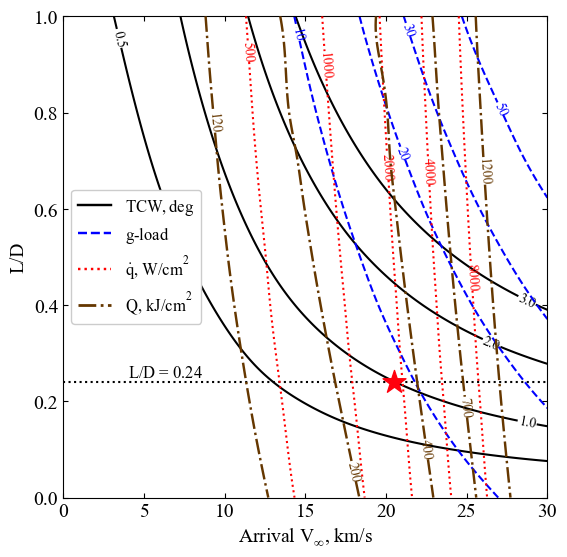

In [41]:
x = np.loadtxt('../../../data/acta-astronautica/uranus-orbiter-probe/'+runID+'vinf_kms_array.txt')
y = np.loadtxt('../../../data/acta-astronautica/uranus-orbiter-probe/'+runID+'LD_array.txt')

Z1 = np.loadtxt('../../../data/acta-astronautica/uranus-orbiter-probe/'+runID+'TCW_array.txt')
G1 = np.loadtxt('../../../data/acta-astronautica/uranus-orbiter-probe/'+runID+'acc_net_g_max_array.txt')
Q1 = np.loadtxt('../../../data/acta-astronautica/uranus-orbiter-probe/'+runID+'q_stag_total_max_array.txt')
H1 = np.loadtxt('../../../data/acta-astronautica/uranus-orbiter-probe/'+runID+'heatload_max_array.txt')
S1 = np.loadtxt('../../../data/acta-astronautica/uranus-orbiter-probe/'+runID+'stag_pres_atm_max_array.txt')


f1 = interpolate.interp2d(x, y, np.transpose(Z1), kind='cubic')
g1 = interpolate.interp2d(x, y, np.transpose(G1), kind='cubic')
q1 = interpolate.interp2d(x, y, np.transpose(Q1), kind='cubic')
h1 = interpolate.interp2d(x, y, np.transpose(H1), kind='cubic')


x_new =  np.linspace( 0.0,   30,  310)
y_new =  np.linspace( 0.0,   1.0 ,110)
z_new =  np.zeros((len(x_new),len(y_new)))

z1_new =  np.zeros((len(x_new),len(y_new)))
g1_new =  np.zeros((len(x_new),len(y_new)))
q1_new =  np.zeros((len(x_new),len(y_new)))
h1_new =  np.zeros((len(x_new),len(y_new)))


for i in range(0,len(x_new)):
    for j in range(0,len(y_new)):

        z1_new[i,j] = f1(x_new[i],y_new[j])
        g1_new[i,j] = g1(x_new[i],y_new[j])
        q1_new[i,j] = q1(x_new[i],y_new[j])
        h1_new[i,j] = h1(x_new[i],y_new[j])




Z1 = z1_new
G1 = g1_new
Q1 = q1_new
H1 = h1_new/1000.0

X, Y = np.meshgrid(x_new, y_new)


Zlevels = np.array([0.5,1.0,2.0,3.0])

Glevels = np.array([10.0, 20.0, 30.0, 50.0])
Qlevels = np.array([500.0, 1000.0, 2000.0, 4000.0, 8000.0])
Hlevels = np.array([120.0, 200.0, 400.0, 700.0, 1200.0])


fig = plt.figure()
fig.set_size_inches([6.25,6.25])
plt.rc('font',family='Times New Roman')
params = {'mathtext.default': 'regular' }
plt.rcParams.update(params)


ZCS1 = plt.contour(X, Y, np.transpose(Z1), levels=Zlevels, colors='black',zorder=0)



plt.clabel(ZCS1, inline=1, fontsize=10, colors='black',fmt='%.1f',inline_spacing=1,zorder=0)
ZCS1.collections[0].set_linewidths(1.5)
ZCS1.collections[1].set_linewidths(1.5)
ZCS1.collections[2].set_linewidths(1.5)
ZCS1.collections[3].set_linewidths(1.5)
ZCS1.collections[0].set_label(r'$TCW, deg$')


GCS1 = plt.contour(X, Y, np.transpose(G1), levels=Glevels, colors='blue',linestyles='dashed',zorder=1)

plt.clabel(GCS1, inline=1, fontsize=10, colors='blue',fmt='%d',inline_spacing=0,zorder=1)


GCS1.collections[0].set_linewidths(1.5)
GCS1.collections[1].set_linewidths(1.5)
GCS1.collections[2].set_linewidths(1.5)
GCS1.collections[3].set_linewidths(1.5)
GCS1.collections[0].set_label(r'$g$'+r'-load')


QCS1 = plt.contour(X, Y, np.transpose(Q1), levels=Qlevels, colors='red',linestyles='dotted',zorder=13)

plt.clabel(QCS1, inline=1, fontsize=10, colors='red',fmt='%d',inline_spacing=0,zorder=13)
QCS1.collections[0].set_linewidths(1.5)
QCS1.collections[1].set_linewidths(1.5)
QCS1.collections[2].set_linewidths(1.5)
QCS1.collections[3].set_linewidths(1.5)
QCS1.collections[4].set_linewidths(1.5)
QCS1.collections[1].set_label(r'$\dot{q}$'+', '+r'$W/cm^2$')


HCS1 = plt.contour(X, Y, np.transpose(H1), levels=Hlevels, colors='xkcd:brown',linestyles='dashdot',zorder=14)

plt.clabel(HCS1, inline=1, fontsize=10, colors='xkcd:brown',fmt='%d',inline_spacing=0,zorder=14)
HCS1.collections[0].set_linewidths(1.75)
HCS1.collections[1].set_linewidths(1.75)
HCS1.collections[2].set_linewidths(1.75)
HCS1.collections[3].set_linewidths(1.75)
HCS1.collections[4].set_linewidths(1.75)
HCS1.collections[0].set_label(r'$Q$'+', '+r'$kJ/cm^2$')


plt.ylabel("L/D",fontsize=14)
plt.xlabel("Arrival "+r'$V_\infty$'+r', km/s' ,fontsize=14)
plt.xticks(np.array([ 0.0, 5, 10, 15, 20, 25, 30]),fontsize=14)
plt.yticks(np.array([ 0.0, 0.2, 0.4, 0.6, 0.8, 1.0]),fontsize=14)
ax = plt.gca()
ax.tick_params(direction='in')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')

#plt.legend(loc='lower left', fontsize=12)
from matplotlib.lines import Line2D
lines = [Line2D([0], [0], color='black', linewidth=1, linestyle='solid'),
         Line2D([0], [0], color='blue',  linewidth=1, linestyle='dashed'),
         Line2D([0], [0], color='red',  linewidth=1, linestyle='dotted'),
         Line2D([0], [0], color='xkcd:brown',  linewidth=1, linestyle='dashdot')]
labels = ['1', '2', '3', '4']

#plt.legend(lines, labels, loc='lower left', fontsize=12)

colors = ['black', 'red', 'green']
lines = [Line2D([0], [0], color='black', linewidth=1.75, linestyle='solid'),
         Line2D([0], [0], color='blue',  linewidth=1.75, linestyle='dashed'),
         Line2D([0], [0], color='red',  linewidth=1.75, linestyle='dotted'),
         Line2D([0], [0], color='xkcd:brown',  linewidth=2.00, linestyle='dashdot')]
labels = [r'$TCW, deg$', r'$g$'+r'-load', r'$\dot{q}$'+', '+r'$W/cm^2$', r'$Q$'+', '+r'$kJ/cm^2$']
plt.legend(lines, labels, loc='center left',fontsize=12, framealpha=1)

plt.axhline(y=0.24, color='k', linestyle='dotted')
plt.text(4, 0.25, r"$L/D$ = 0.24", fontsize=12)
plt.scatter(20.5, 0.24, marker="*", s=300, color='xkcd:bright red', zorder=100)

plt.savefig('../../../data/acta-astronautica/uranus-orbiter-probe/uranus-tradespace.png', dpi= 300,bbox_inches='tight')
plt.savefig('../../../data/acta-astronautica/uranus-orbiter-probe/uranus-tradespace.pdf', dpi=300,bbox_inches='tight')
plt.savefig('../../../data/acta-astronautica/uranus-orbiter-probe/uranus-tradespace.eps', dpi=300,bbox_inches='tight')

plt.show()

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

from AMAT.launcher import Launcher
launcher1 = Launcher('Falcon Heavy Exp. with kick',
                     datafile='../../../launcher-data/falcon-heavy-expendable-w-star-48.csv')

In [3]:
from AMAT.interplanetary import Interplanetary
interplanetary1 = Interplanetary(ID="Uranus High Energy",
                                 datafile='../../../interplanetary-data-private/uranus/uranus-high-energy.xlsx',
                                 sheet_name='Sheet1',
                                 Lcdate_format=None)

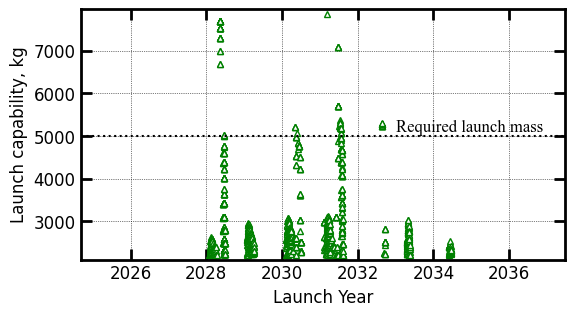

In [6]:
Lcmass = interplanetary1.compute_launch_capability(launcher1)

plt.figure(figsize=(6.25,3.25))
plt.plot(interplanetary1.Lcdate, Lcmass, marker='^', mec='g', mfc='w', markersize=5, linestyle='None')
#plt.title(interplanetary1.ID+" : "+launcher1.ID, fontsize=12)
plt.xlabel(r'Launch Year', fontsize=12)
plt.ylabel("Launch capability, kg", fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax = plt.gca()
ax.tick_params(direction='in')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
plt.ylim(max(0, sorted(set(Lcmass))[1])-100, max(Lcmass)+100)

plt.rc('font',family='Times New Roman')
params = {'mathtext.default': 'regular' }
plt.rcParams.update(params)


#plt.legend(loc='upper right', fontsize=12, framealpha=0.8)

ax.xaxis.set_tick_params(direction='in', which='both')
ax.yaxis.set_tick_params(direction='in', which='both')

ax.xaxis.set_tick_params(width=2, length=8)
ax.yaxis.set_tick_params(width=2, length=8)

ax.xaxis.set_tick_params(width=1, length=6, which='minor')
ax.yaxis.set_tick_params(width=1, length=6, which='minor')

ax.xaxis.grid(which='major', color='k', linestyle='dotted', linewidth=0.5)
ax.xaxis.grid(which='minor', color='k', linestyle='dotted', linewidth=0.0)

ax.yaxis.grid(which='major', color='k', linestyle='dotted', linewidth=0.5)
ax.yaxis.grid(which='minor', color='k', linestyle='dotted', linewidth=0.0)

for axis in ['top', 'bottom', 'left', 'right']:
    ax.spines[axis].set_linewidth(2)
    
plt.axhline(y=5000, color='k', linestyle='dotted')
plt.text(pd.to_datetime("2033-01-01"), 5100, "Required launch mass", fontsize=12)

plt.savefig('../../../data/acta-astronautica/uranus-orbiter-probe/falcon-heavy-exp-launch-capability.png', dpi= 300,bbox_inches='tight')
plt.savefig('../../../data/acta-astronautica/uranus-orbiter-probe/falcon-heavy-exp-launch-capability.pdf', dpi=300,bbox_inches='tight')
plt.savefig('../../../data/acta-astronautica/uranus-orbiter-probe/falcon-heavy-exp-launch-capability.eps', dpi=300,bbox_inches='tight')

plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


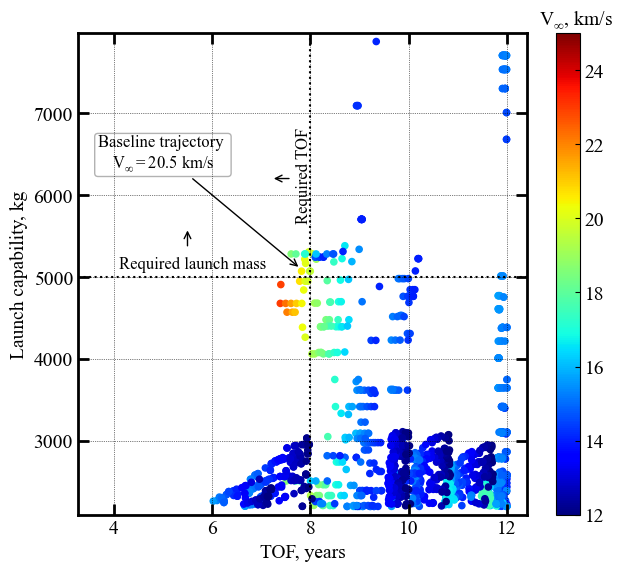

In [7]:
Lcmass = interplanetary1.compute_launch_capability(launcher1)

plt.figure(figsize=(7.25, 6.25))
plt.scatter(interplanetary1.TOF, Lcmass, c=interplanetary1.Avinf , marker='o', cmap='jet',
            vmin=interplanetary1.Avinf.min(), vmax=interplanetary1.Avinf.max(), s=20)
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)
cbar.set_label(r'$V_{\infty}$, km/s', labelpad=-20, y=1.05, rotation=0, fontsize=14)
cbar.ax.tick_params(axis='y', direction='in')
#plt.title(interplanetary1.ID+" : "+launcher1.ID, fontsize=14)
plt.xlabel(r'TOF, years', fontsize=14)
plt.ylabel("Launch capability, kg", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax = plt.gca()
ax.tick_params(direction='in')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
plt.ylim(max(0, sorted(set(Lcmass))[1])-100, max(Lcmass)+100)


#plt.legend(loc='upper right', fontsize=12, framealpha=0.8)

ax.xaxis.set_tick_params(direction='in', which='both')
ax.yaxis.set_tick_params(direction='in', which='both')

ax.xaxis.set_tick_params(width=2, length=8)
ax.yaxis.set_tick_params(width=2, length=8)

ax.xaxis.set_tick_params(width=1, length=6, which='minor')
ax.yaxis.set_tick_params(width=1, length=6, which='minor')

ax.xaxis.grid(which='major', color='k', linestyle='dotted', linewidth=0.5)
ax.xaxis.grid(which='minor', color='k', linestyle='dotted', linewidth=0.0)

ax.yaxis.grid(which='major', color='k', linestyle='dotted', linewidth=0.5)
ax.yaxis.grid(which='minor', color='k', linestyle='dotted', linewidth=0.0)

for axis in ['top', 'bottom', 'left', 'right']:
    ax.spines[axis].set_linewidth(2)
    
plt.axhline(y=5000, color='k', linestyle='dotted')
plt.text(4.1, 5100, "Required launch mass", fontsize=12)

plt.axvline(x=8, color='k', linestyle='dotted')
plt.text(7.7, 5700, "Required TOF", fontsize=12, rotation=90)

plt.annotate("Baseline trajectory \n"+r"$V_{\infty} = 20.5$"+ " km/s"  , xy=(7.8, 5100), 
                                                                   xytext=(5, 6500), 
                                                                   va="center", ha="center", 
                    arrowprops=dict(arrowstyle='->, head_width=0.2', facecolor='blue'), fontsize=12,color='k',bbox=dict(boxstyle='round,pad=0.2', fc='none', ec='k', alpha=0.3))


plt.annotate("" , xy=(5.5, 5600), 
                   xytext=(5.5, 5200), 
                   va="center", ha="center", 
                    arrowprops=dict(arrowstyle='->, head_width=0.2', facecolor='blue'), fontsize=12,color='k',bbox=dict(boxstyle='round,pad=0.2', fc='none', ec='k', alpha=0.3))


plt.annotate("" , xy=(7.2, 6200), 
                   xytext=(7.7, 6200), 
                   va="center", ha="center", 
                    arrowprops=dict(arrowstyle='->, head_width=0.2', facecolor='blue'), fontsize=12,color='k',bbox=dict(boxstyle='round,pad=0.2', fc='none', ec='k', alpha=0.3))


plt.savefig('../../../data/acta-astronautica/uranus-orbiter-probe/trajectory-trade-space.png', dpi= 300,bbox_inches='tight')
plt.savefig('../../../data/acta-astronautica/uranus-orbiter-probe/trajectory-trade-space.pdf', dpi=300,bbox_inches='tight')
plt.savefig('../../../data/acta-astronautica/uranus-orbiter-probe/trajectory-trade-space.eps', dpi=300,bbox_inches='tight')

plt.show()

In [4]:
df = interplanetary1.df
df[(df["TOF"]<=8) & (df["Avinf"]>=20) & (df["Avinf"]<=24) & (df["LC3"]<=55)]

,Bodies,Times,Lcdate,Arrival Date,LC3,TOF,DSMdv,DSM Mass,ArrivalVinf_Vector,Avinf,Adec,Unnamed: 11,Paths,Unnamed: 13,Unnamed: 14
11717,[399 399 599 799],2031-07-18 2034-05-16 2035-09-09 2039-06-07,2031-07-18,2039-06-07,52.266,7.886090,1.04,864.379658,[-9.511251449584961 17.8606014251709 0.2777369...,20.237,-48.836271,NaN,NaN,NaN,NaN
11740,[399 399 599 799],2031-07-22 2034-05-16 2035-09-04 2039-05-18,2031-07-22,2039-05-18,53.866,7.820462,1.04,864.379658,[-9.630807876586914 18.130252838134766 0.28104...,20.531,-48.894486,NaN,NaN,NaN,NaN
11745,[399 399 599 799],2031-07-22 2034-05-24 2035-09-14 2039-06-17,2031-07-22,2039-06-17,52.823,7.902598,0.84,675.544505,[-9.463287353515625 17.745807647705078 0.27622...,20.113,-48.803860,NaN,NaN,NaN,NaN


In [5]:
launcher1.launchMass(53.866)

array(5068.50561)